In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from scipy.interpolate import make_interp_spline

In [38]:
df = pd.read_csv('incidencias correas_CLEAN.csv')

In [39]:
df

,ID_ INCIDENCIA,ID_COMPONENTE,RODAMIENTO_TERMOGRAFIA,FOTO_1,URL_F1_POL,URL_APP_F1,NUMERO_POLIN,LADO_POLIN,NIVEL_DAÑO,DESCRIPCION_INCIDENCIA,...,FOTO4_INC_CINTA,FOTO5_INC_RASPADOR,FOTO45_INC_POLIN,FECHA_INSPECCION,TAG_EQUIPO,DESCRIPCION_COIMPONENTE,CONCATE_DESCRIP_TAG,RUTA_INSP,ESTADO_V2,ESTADO_INCIDENCIA
0,b8d16162,COMP00515,NaN,5_3 INCIDENCIA_POLINES_Images/b8d16162.FOTO_1....,https://www.appsheet.com/template/gettablefile...,https://www.appsheet.com/template/gettablefile...,NaN,LADO LIBRE,NaN,NaN,...,NaN,NaN,NaN,9/05/2025,531-26-1120,POLÍN MOTRIZ,531-26-1120 POLÍN MOTRIZ,R005,NaN,NaN
1,18b3765e,COMP00515,NaN,5_3 INCIDENCIA_POLINES_Images/18b3765e.FOTO_1....,https://www.appsheet.com/template/gettablefile...,https://www.appsheet.com/template/gettablefile...,NaN,LADO ACCIONAMIENTO,NaN,NaN,...,NaN,NaN,NaN,9/05/2025,531-26-1120,POLÍN MOTRIZ,531-26-1120 POLÍN MOTRIZ,R005,NaN,NaN
2,bb1d6a55,COMP00516,NaN,5_3 INCIDENCIA_POLINES_Images/bb1d6a55.FOTO_1....,https://www.appsheet.com/template/gettablefile...,https://www.appsheet.com/template/gettablefile...,NaN,LADO ACCIONAMIENTO,NaN,NaN,...,NaN,NaN,NaN,9/05/2025,531-26-1120,REDUCTOR,531-26-1120 REDUCTOR,R005,NaN,NaN
3,a4bb6faa,COMP00517,NaN,5_3 INCIDENCIA_POLINES_Images/a4bb6faa.FOTO_1....,https://www.appsheet.com/template/gettablefile...,https://www.appsheet.com/template/gettablefile...,NaN,LADO LIBRE,NaN,NaN,...,NaN,NaN,NaN,9/05/2025,531-26-1120,POLÍN COLA,531-26-1120 POLÍN COLA,R005,NaN,NaN
4,0c0d63cc,COMP00517,NaN,5_3 INCIDENCIA_POLINES_Images/0c0d63cc.FOTO_1....,https://www.appsheet.com/template/gettablefile...,https://www.appsheet.com/template/gettablefile...,NaN,LADO ACCIONAMIENTO,NaN,NaN,...,NaN,NaN,NaN,9/05/2025,531-26-1120,POLÍN COLA,531-26-1120 POLÍN COLA,R005,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7341,c39abaae,COMP00800,NaN,5_3 INCIDENCIA_POLINES_Images/c39abaae.FOTO_1....,https://www.appsheet.com/template/gettablefile...,https://www.appsheet.com/template/gettablefile...,NaN,LADO LIBRE,BAJO,NaN,...,NaN,NaN,NaN,30/01/2026,531-26-1162,POLÍN MOTRIZ,531-26-1162 POLÍN MOTRIZ,R007,NORMAL,NaN
7342,3f11ebe5,COMP00838,NaN,5_3 INCIDENCIA_POLINES_Images/3f11ebe5.FOTO_1....,https://www.appsheet.com/template/gettablefile...,https://www.appsheet.com/template/gettablefile...,NaN,LADO ACCIONAMIENTO,BAJO,NaN,...,NaN,NaN,NaN,30/01/2026,531-26-1164,POLÍN MOTRIZ,531-26-1164 POLÍN MOTRIZ,R007,NORMAL,NaN
7343,5b552103,COMP00839,NaN,5_3 INCIDENCIA_POLINES_Images/5b552103.FOTO_1....,https://www.appsheet.com/template/gettablefile...,https://www.appsheet.com/template/gettablefile...,NaN,LADO ACCIONAMIENTO,BAJO,NaN,...,NaN,NaN,NaN,30/01/2026,531-26-1164,REDUCTOR,531-26-1164 REDUCTOR,R007,NORMAL,NaN
7344,9f128f3f,COMP00840,NaN,5_3 INCIDENCIA_POLINES_Images/9f128f3f.FOTO_1....,https://www.appsheet.com/template/gettablefile...,https://www.appsheet.com/template/gettablefile...,NaN,LADO ACCIONAMIENTO,BAJO,NaN,...,NaN,NaN,NaN,30/01/2026,531-26-1164,POLÍN COLA,531-26-1164 POLÍN COLA,R007,NORMAL,NaN


In [40]:
df_v1 = df[['ID_ INCIDENCIA', 'TEMP_F1', 'ESTADO_TEMP', 'FECHA_INSPECCION','TAG_EQUIPO', 'DESCRIPCION_COIMPONENTE', 'RUTA_INSP', 'LADO_POLIN' ]]
df_v1

,ID_ INCIDENCIA,TEMP_F1,ESTADO_TEMP,FECHA_INSPECCION,TAG_EQUIPO,DESCRIPCION_COIMPONENTE,RUTA_INSP,LADO_POLIN
0,b8d16162,19.0,NORMAL,9/05/2025,531-26-1120,POLÍN MOTRIZ,R005,LADO LIBRE
1,18b3765e,28.4,NORMAL,9/05/2025,531-26-1120,POLÍN MOTRIZ,R005,LADO ACCIONAMIENTO
2,bb1d6a55,39.3,NORMAL,9/05/2025,531-26-1120,REDUCTOR,R005,LADO ACCIONAMIENTO
3,a4bb6faa,16.8,NORMAL,9/05/2025,531-26-1120,POLÍN COLA,R005,LADO LIBRE
4,0c0d63cc,16.6,NORMAL,9/05/2025,531-26-1120,POLÍN COLA,R005,LADO ACCIONAMIENTO
...,...,...,...,...,...,...,...,...
7341,c39abaae,20.0,NORMAL,30/01/2026,531-26-1162,POLÍN MOTRIZ,R007,LADO LIBRE
7342,3f11ebe5,20.0,NORMAL,30/01/2026,531-26-1164,POLÍN MOTRIZ,R007,LADO ACCIONAMIENTO
7343,5b552103,32.0,ENFRIAR,30/01/2026,531-26-1164,REDUCTOR,R007,LADO ACCIONAMIENTO
7344,9f128f3f,19.0,NORMAL,30/01/2026,531-26-1164,POLÍN COLA,R007,LADO ACCIONAMIENTO


In [41]:
df_v1 = df_v1.rename(columns={'DESCRIPCION_COIMPONENTE': 'DESCRIPCION_COMPONENTE'})
df_clean = df_v1
df_clean

,ID_ INCIDENCIA,TEMP_F1,ESTADO_TEMP,FECHA_INSPECCION,TAG_EQUIPO,DESCRIPCION_COMPONENTE,RUTA_INSP,LADO_POLIN
0,b8d16162,19.0,NORMAL,9/05/2025,531-26-1120,POLÍN MOTRIZ,R005,LADO LIBRE
1,18b3765e,28.4,NORMAL,9/05/2025,531-26-1120,POLÍN MOTRIZ,R005,LADO ACCIONAMIENTO
2,bb1d6a55,39.3,NORMAL,9/05/2025,531-26-1120,REDUCTOR,R005,LADO ACCIONAMIENTO
3,a4bb6faa,16.8,NORMAL,9/05/2025,531-26-1120,POLÍN COLA,R005,LADO LIBRE
4,0c0d63cc,16.6,NORMAL,9/05/2025,531-26-1120,POLÍN COLA,R005,LADO ACCIONAMIENTO
...,...,...,...,...,...,...,...,...
7341,c39abaae,20.0,NORMAL,30/01/2026,531-26-1162,POLÍN MOTRIZ,R007,LADO LIBRE
7342,3f11ebe5,20.0,NORMAL,30/01/2026,531-26-1164,POLÍN MOTRIZ,R007,LADO ACCIONAMIENTO
7343,5b552103,32.0,ENFRIAR,30/01/2026,531-26-1164,REDUCTOR,R007,LADO ACCIONAMIENTO
7344,9f128f3f,19.0,NORMAL,30/01/2026,531-26-1164,POLÍN COLA,R007,LADO ACCIONAMIENTO


In [42]:
columnas_grupo = ['ID_ INCIDENCIA', 'TEMP_F1', 'ESTADO_TEMP', 'FECHA_INSPECCION','TAG_EQUIPO', 'DESCRIPCION_COIMPONENTE', 'RUTA_INSP', 'LADO_POLIN' ]

# Verificamos que todas las columnas existan en el archivo
columnas_presentes = [col for col in columnas_grupo if col in df_clean.columns]

if len(columnas_presentes) < 3:
    print(f"ADVERTENCIA: Faltan algunas columnas para la agrupación completa.")
    print(f"Columnas encontradas: {columnas_presentes}")


print(f"\n--- Análisis Agrupado por {', '.join(columnas_presentes)} ---")



--- Análisis Agrupado por ID_ INCIDENCIA, TEMP_F1, ESTADO_TEMP, FECHA_INSPECCION, TAG_EQUIPO, RUTA_INSP, LADO_POLIN ---


In [43]:
 # Calculamos estadísticas detalladas por cada grupo
resumen_grupos = df_clean.groupby(columnas_presentes)['TEMP_F1'].agg(
    Promedio='mean',
    Maximo='max',
    Minimo='min',
    Registros='count'
).reset_index()

# Ordenar por temperatura máxima para identificar puntos críticos rápido
resumen_grupos = resumen_grupos.sort_values(by='Maximo', ascending=False)

print(resumen_grupos.to_string(index=False))

ID_ INCIDENCIA  TEMP_F1          ESTADO_TEMP FECHA_INSPECCION  TAG_EQUIPO RUTA_INSP         LADO_POLIN  Promedio  Maximo  Minimo  Registros
      9e5d74fe     79.0      REQUIERE CAMBIO       24/06/2025 531-26-5020      R002         LADO LIBRE      79.0    79.0    79.0          1
      e7466275     78.0      REQUIERE CAMBIO       08/01/2026 531-26-2100      R004 LADO ACCIONAMIENTO      78.0    78.0    78.0          1
      0a0d4ace     78.0      REQUIERE CAMBIO       28/01/2026 531-26-1100      R004 LADO ACCIONAMIENTO      78.0    78.0    78.0          1
      efb50f4d     77.0      REQUIERE CAMBIO       28/01/2026 531-26-2100      R004 LADO ACCIONAMIENTO      77.0    77.0    77.0          1
      e527a2cd     77.0      REQUIERE CAMBIO       26/01/2026 531-26-2124      R005 LADO ACCIONAMIENTO      77.0    77.0    77.0          1
      92a06ed3     77.0      REQUIERE CAMBIO       24/12/2025 531-26-2100      R004 LADO ACCIONAMIENTO      77.0    77.0    77.0          1
      ef710c50     7

In [49]:
df_clean

,ID_ INCIDENCIA,TEMP_F1,ESTADO_TEMP,FECHA_INSPECCION,TAG_EQUIPO,DESCRIPCION_COMPONENTE,RUTA_INSP,LADO_POLIN
0,b8d16162,19.0,NORMAL,9/05/2025,531-26-1120,POLÍN MOTRIZ,R005,LADO LIBRE
1,18b3765e,28.4,NORMAL,9/05/2025,531-26-1120,POLÍN MOTRIZ,R005,LADO ACCIONAMIENTO
2,bb1d6a55,39.3,NORMAL,9/05/2025,531-26-1120,REDUCTOR,R005,LADO ACCIONAMIENTO
3,a4bb6faa,16.8,NORMAL,9/05/2025,531-26-1120,POLÍN COLA,R005,LADO LIBRE
4,0c0d63cc,16.6,NORMAL,9/05/2025,531-26-1120,POLÍN COLA,R005,LADO ACCIONAMIENTO
...,...,...,...,...,...,...,...,...
7341,c39abaae,20.0,NORMAL,30/01/2026,531-26-1162,POLÍN MOTRIZ,R007,LADO LIBRE
7342,3f11ebe5,20.0,NORMAL,30/01/2026,531-26-1164,POLÍN MOTRIZ,R007,LADO ACCIONAMIENTO
7343,5b552103,32.0,ENFRIAR,30/01/2026,531-26-1164,REDUCTOR,R007,LADO ACCIONAMIENTO
7344,9f128f3f,19.0,NORMAL,30/01/2026,531-26-1164,POLÍN COLA,R007,LADO ACCIONAMIENTO


In [50]:
# 2. Filtrar por Equipo y Componente
filtro = (df_clean['TAG_EQUIPO'] == '531-26-1100') & (df_clean['DESCRIPCION_COMPONENTE'] == 'REDUCTOR')
df_filtrado = df_clean[filtro].copy()


In [51]:
# 3. Convertir la fecha a formato datetime
df_filtrado['FECHA_INSPECCION'] = pd.to_datetime(df_filtrado['FECHA_INSPECCION'], dayfirst=True)

# 4. Agrupar por fecha para ignorar el LADO_POLIN (calculamos el promedio del día)
df_plot = df_filtrado.groupby('FECHA_INSPECCION')['TEMP_F1'].mean().reset_index()
df_plot = df_plot.sort_values('FECHA_INSPECCION')

# 5. Preparar el suavizado (Interpolación Spline)
# Convertimos las fechas a un rango numérico (0, 1, 2...) para que la función matemática trabaje
x = np.array(range(len(df_plot)))
y = df_plot['TEMP_F1'].values

In [52]:
# Creamos 300 puntos entre el inicio y el fin para que la línea se vea curva
x_smooth = np.linspace(x.min(), x.max(), 300) 
spline = make_interp_spline(x, y, k=3) # k=3 define una curva cúbica (suave)
y_smooth = spline(x_smooth)

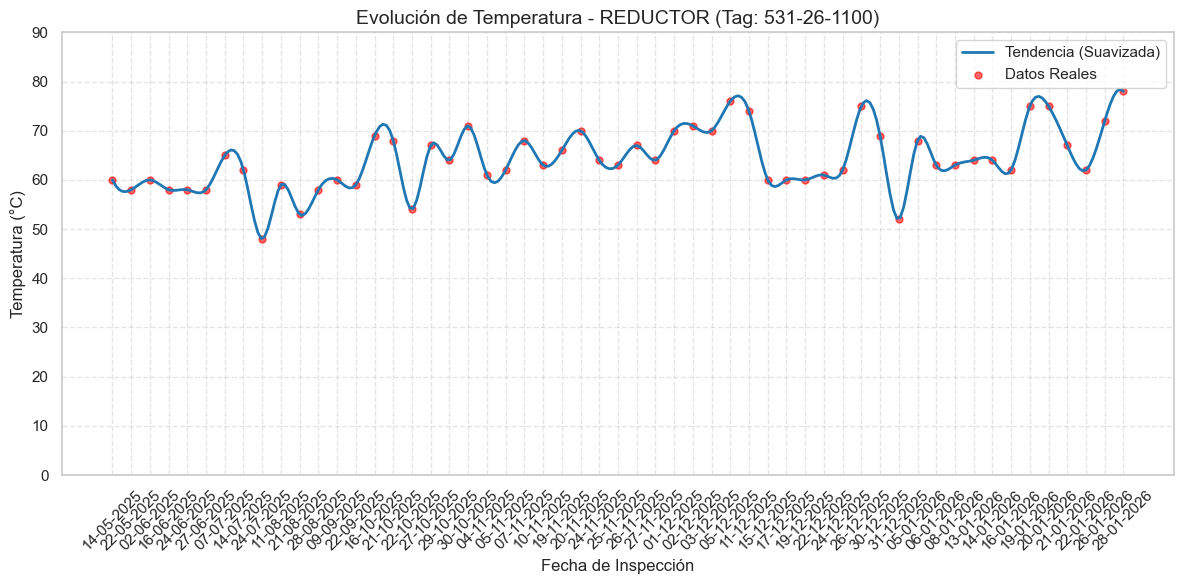

In [54]:
# 6. Crear el gráfico
plt.figure(figsize=(12, 6))

# Dibujar la línea suavizada
plt.plot(x_smooth, y_smooth, label='Tendencia (Suavizada)', color='#1f77b4', linewidth=2)

# Dibujar los puntos reales (opcional, para ver dónde están los datos originales)
plt.scatter(x, y, color='red', s=25, alpha=0.6, label='Datos Reales')
plt.ylim(0, 90)

# Configurar el eje X con las fechas originales
plt.xticks(ticks=x, labels=df_plot['FECHA_INSPECCION'].dt.strftime('%d-%m-%Y'), rotation=45)

# Detalles estéticos
plt.title('Evolución de Temperatura - REDUCTOR (Tag: 531-26-1100)', fontsize=14)
plt.xlabel('Fecha de Inspección')
plt.ylabel('Temperatura (°C)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()

# 7. Guardar o mostrar
plt.show()

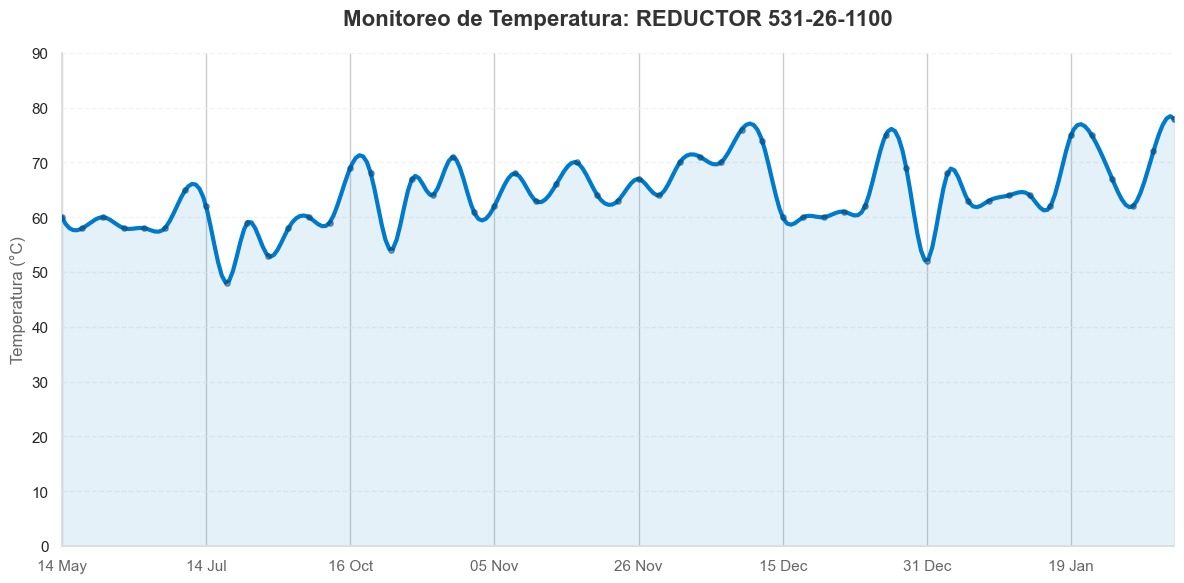

: 

In [ ]:



# Suavizado
x = np.array(range(len(df_plot)))
y = df_plot['TEMP_F1'].values
x_smooth = np.linspace(x.min(), x.max(), 300)
spline = make_interp_spline(x, y, k=3)
y_smooth = spline(x_smooth)

# 2. Creación del gráfico con FORMATO PROFESIONAL
fig, ax = plt.subplots(figsize=(12, 6), facecolor='white')

# Línea principal con sombra (Área sombreada debajo)
ax.plot(x_smooth, y_smooth, color='#007ACC', linewidth=3, label='Temperatura Reductor', zorder=3)
ax.fill_between(x_smooth, y_smooth, color='#007ACC', alpha=0.1) # Sombreado suave

# Puntos de datos (más discretos)
ax.scatter(x, y, color='#004A7C', s=15, alpha=0.5, zorder=4)

# Configuración de los Ejes y Rango
ax.set_ylim(0, 90)
ax.set_xlim(x.min(), x.max())

# Limpiar el diseño (Quitar bordes innecesarios)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#DDDDDD')
ax.spines['bottom'].set_color('#DDDDDD')

# Cuadrícula solo horizontal para no saturar
ax.yaxis.grid(True, linestyle='--', alpha=0.7, color='#EEEEEE')
ax.set_axisbelow(True) # Pone la cuadrícula detrás de la línea

# Títulos y etiquetas con fuentes limpias
ax.set_title('Monitoreo de Temperatura: REDUCTOR 531-26-1100', fontsize=16, pad=20, fontweight='bold', color='#333333')
ax.set_ylabel('Temperatura (°C)', fontsize=12, color='#666666')

# Ajustar las fechas en el eje X (mostrando 1 de cada 7 para no amontonar)
plt.xticks(ticks=x[::7], labels=df_plot['FECHA_INSPECCION'].dt.strftime('%d %b').iloc[::7], color='#666666')

plt.tight_layout()
plt.savefig('grafico_formato_top.png', dpi=300) # dpi=300 para alta resolución
plt.show()